In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = sns.load_dataset("titanic")
print(df.head())
df.info()

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

In [2]:
# sibsp means sibling/spouse aboard. It represents the number of siblings and spouses a passenger had on the Titanic.

# parch stands for "parent/child aboard. It represents the number of parents and children a passenger had on the Titanic.
# parents: mother or father aboard the Titanic.
# Children: son, daughter, step-son, or step-daughter aboard the Titanic.

# pclass stands for "Passenger Class" and represents the socio-economic status of a passenger based on their ticket type

In [3]:
# Checking for missing values in each column
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
# embarked and embarked_town contain the same information, so one of them may be dropped, let's drop the column embarked_town
df.drop(columns=['embark_town'],inplace=True)

In [5]:
# Dropping the 'deck' column due to too many missing values
df.drop(columns=['deck'], inplace=True)

# Fill missing age values with the median age
df['age'].fillna(df['age'].median(), inplace=True)

# Filling missing values in embarked with the mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Verifying no missing values remain
df.isnull().sum()




C:\Users\graun\AppData\Local\Temp\ipykernel_5052\3687344943.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\graun\AppData\Local\Temp\ipykernel_5052\3687344943.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [6]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
print(df.shape)
df = df.drop_duplicates()  # Removes duplicate rows
print(f"Shape after dropping duplicates: {df.shape}")

Number of duplicate rows: 116
(891, 13)
Shape after dropping duplicates: (775, 13)


In [7]:
# Frequency distributions for categorical variables
for col in df.select_dtypes(include=['object']).columns:
    print(f"Frequency distribution for {col}:")
    print(df[col].value_counts(), "\n")

Frequency distribution for sex:
sex
male      483
female    292
Name: count, dtype: int64 

Frequency distribution for embarked:
embarked
S    562
C    155
Q     58
Name: count, dtype: int64 

Frequency distribution for who:
who
man      443
woman    250
child     82
Name: count, dtype: int64 

Frequency distribution for alive:
alive
no     455
yes    320
Name: count, dtype: int64 



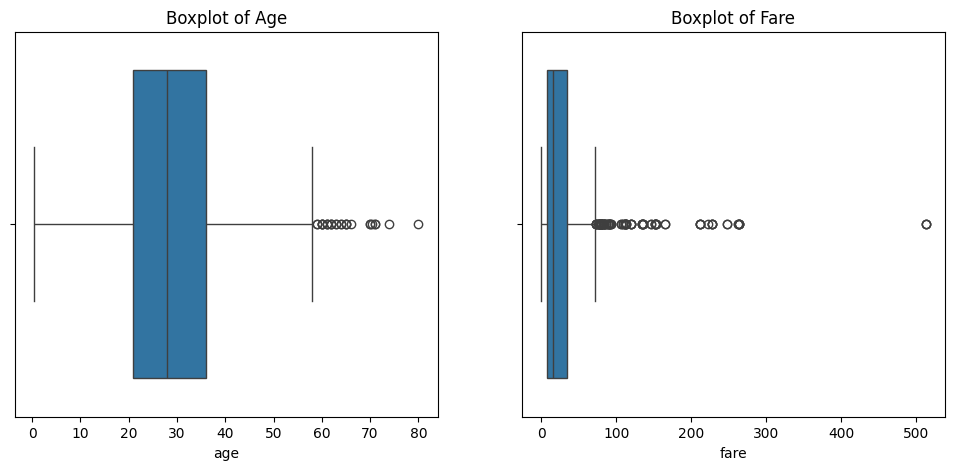

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots to detect outliers in 'age' and 'fare'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['age'])
plt.title("Boxplot of Age")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['fare'])
plt.title("Boxplot of Fare")

plt.show()


In [9]:
# Calculating the IQR for age
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

outliers_age = df[(df['age'] < lower_bound_age) | (df['age'] > upper_bound_age)]
num_outliers_age = outliers_age.shape[0]

# Calculating the IQR for fare
Q1_fare = df['fare'].quantile(0.25)
Q3_fare = df['fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

outliers_fare = df[(df['fare'] < lower_bound_fare) | (df['fare'] > upper_bound_fare)]
num_outliers_fare = outliers_fare.shape[0]

print(f"Number of outliers in Age: {num_outliers_age}")
print(f"Number of outliers in Fare: {num_outliers_fare}")


Number of outliers in Age: 27
Number of outliers in Fare: 102


In [10]:
# Define a function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'age' and 'fare'
df = remove_outliers(df, 'age')
df = remove_outliers(df, 'fare')

# Check new shape of data
print(f"Data shape after outlier removal: {df.shape}")


Data shape after outlier removal: (649, 13)


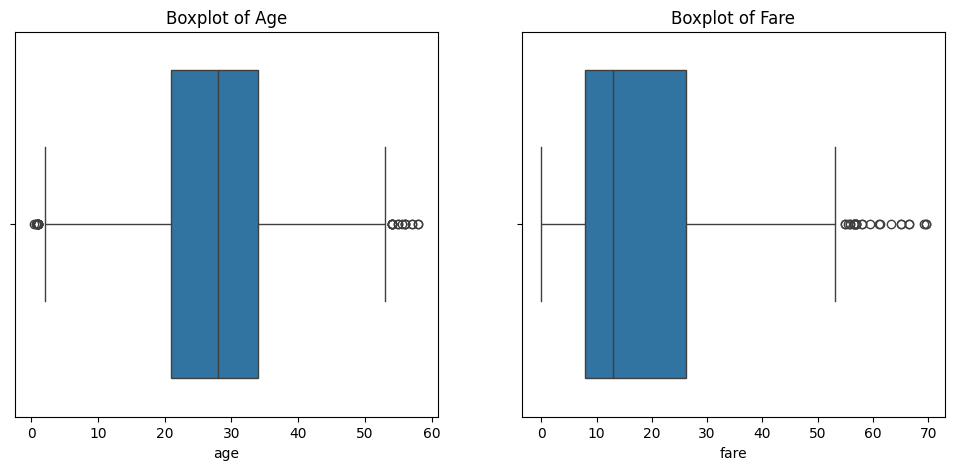

In [11]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['age'])
plt.title("Boxplot of Age")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['fare'])
plt.title("Boxplot of Fare")

plt.show()


#### As we can see there are no outliers in the boxplots now after their removal from the df.

In [12]:
# Checking unique values in categorical columns
categorical_cols = ['sex', 'embarked', 'class', 'who','alive', 'alone']
for col in categorical_cols:
    print(f"Unique values in '{col}':\n{df[col].unique()}\n")


Unique values in 'sex':
['male' 'female']

Unique values in 'embarked':
['S' 'Q' 'C']

Unique values in 'class':
['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

Unique values in 'who':
['man' 'woman' 'child']

Unique values in 'alive':
['no' 'yes']

Unique values in 'alone':
[False  True]



In [13]:
# summary stats for numerical columns
print(df.describe())

# summary stats for categorical columns
print(df.describe(include=['O'])) 

         survived      pclass         age       sibsp       parch        fare
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000
mean     0.371341    2.454545   27.688752    0.523883    0.403698   19.151964
std      0.483536    0.746297   11.998710    1.036286    0.846408   14.392314
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   21.000000    0.000000    0.000000    7.895800
50%      0.000000    3.000000   28.000000    0.000000    0.000000   13.000000
75%      1.000000    3.000000   34.000000    1.000000    0.000000   26.250000
max      1.000000    3.000000   58.000000    8.000000    6.000000   69.550000
         sex embarked  who alive
count    649      649  649   649
unique     2        3    3     2
top     male        S  man    no
freq     422      493  385   408


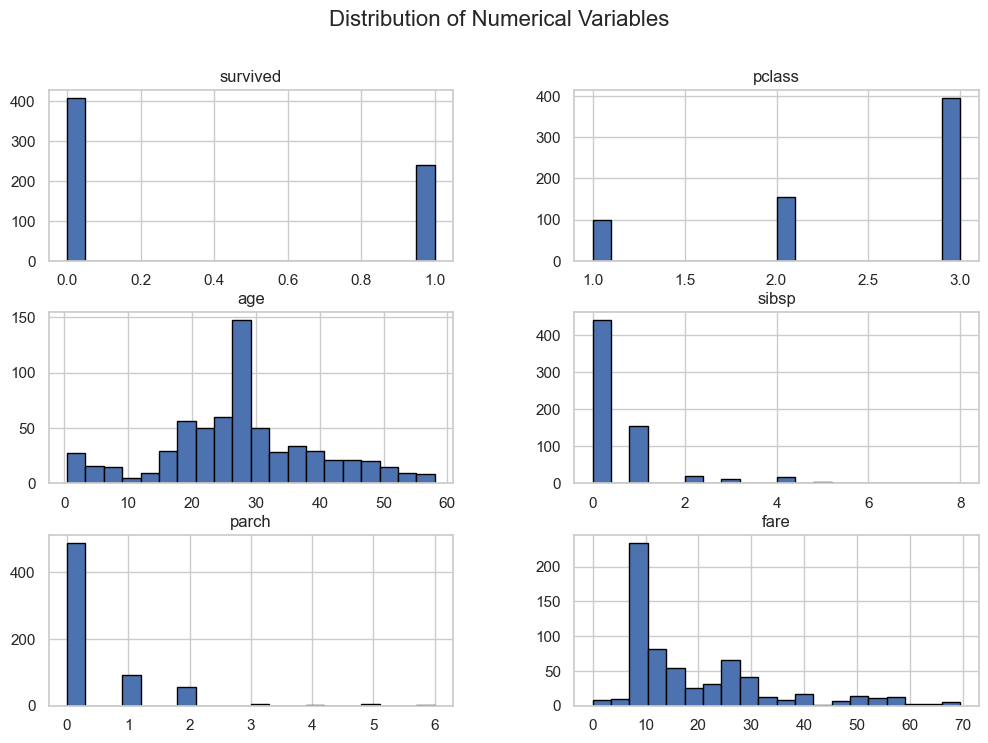

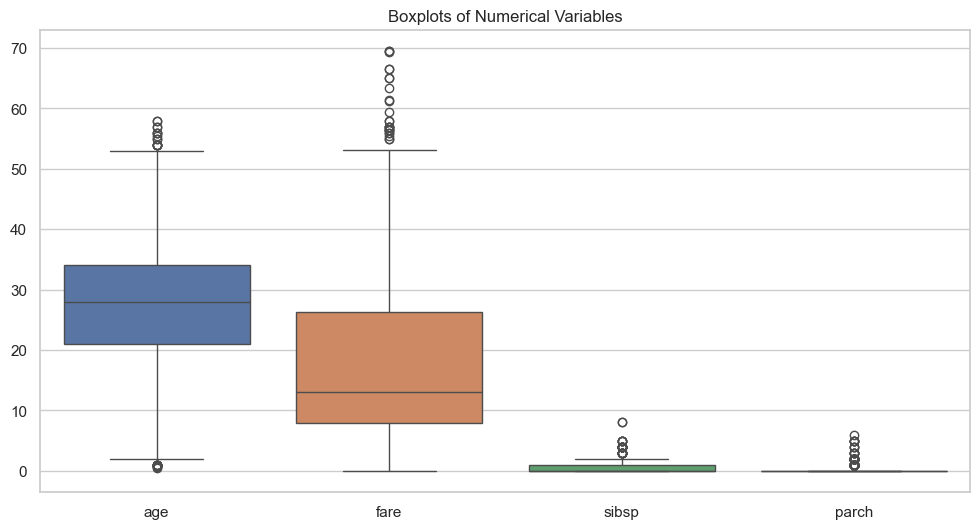

C:\Users\graun\AppData\Local\Temp\ipykernel_5052\3080584449.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette="viridis")
C:\Users\graun\AppData\Local\Temp\ipykernel_5052\3080584449.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette="viridis")
C:\Users\graun\AppData\Local\Temp\ipykernel_5052\3080584449.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette="viridis")
C:\Users\graun\AppData\Local\Temp\ipykernel_5052\3080584449.py:17: FutureWar

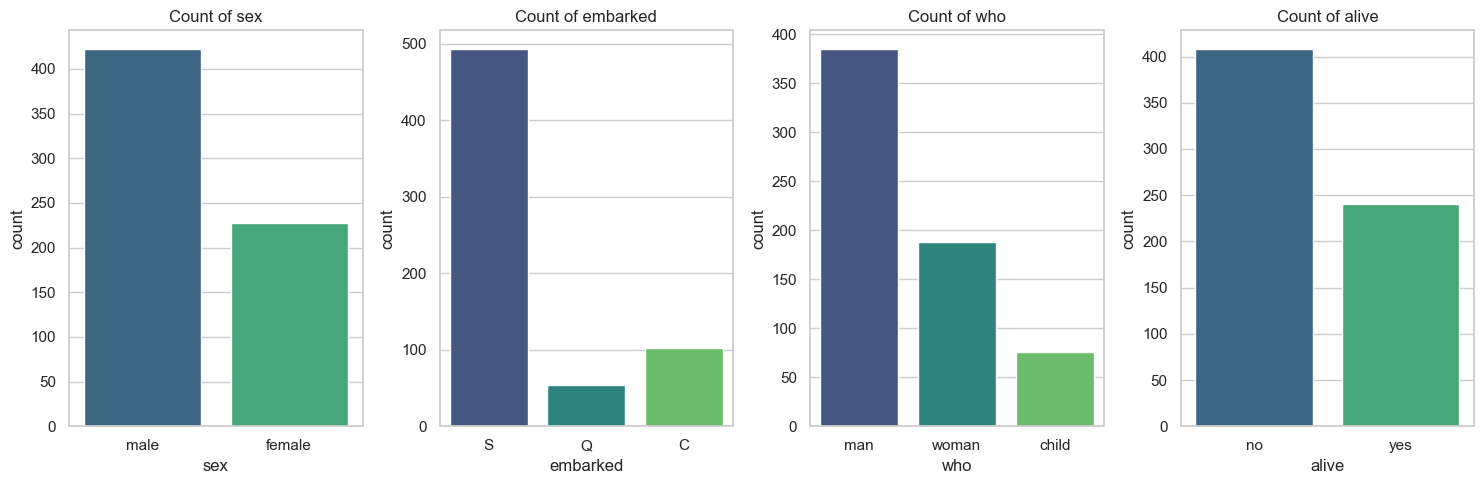

In [14]:

sns.set(style="whitegrid")
# Plotting histograms 
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numerical Variables", fontsize=16)
plt.show()

# Boxplots 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['age', 'fare', 'sibsp', 'parch']])
plt.title("Boxplots of Numerical Variables")
plt.show()

categorical_cols = ['sex', 'embarked', 'who', 'alive']
fig, axes = plt.subplots(1, len(categorical_cols), figsize=(15, 5))

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], ax=axes[i], palette="viridis")
    axes[i].set_title(f"Count of {col}")

plt.tight_layout()
plt.show()


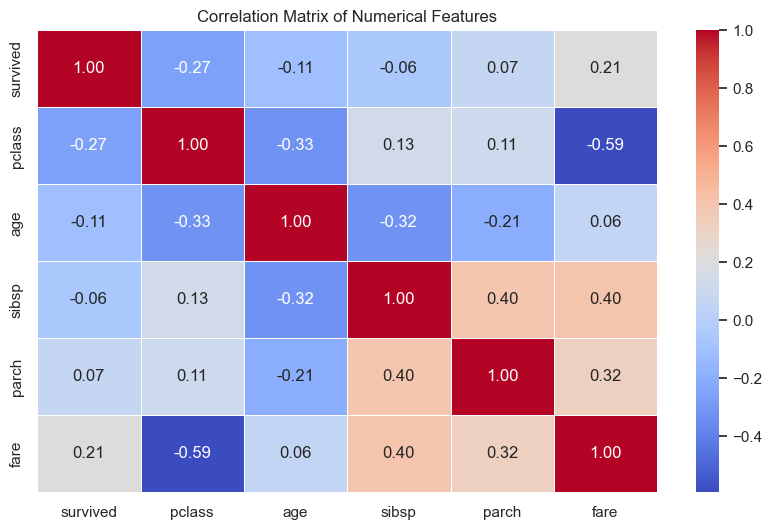

In [15]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


C:\Users\graun\AppData\Local\Temp\ipykernel_5052\4203505342.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="pclass", y="fare", data=df, palette="coolwarm")


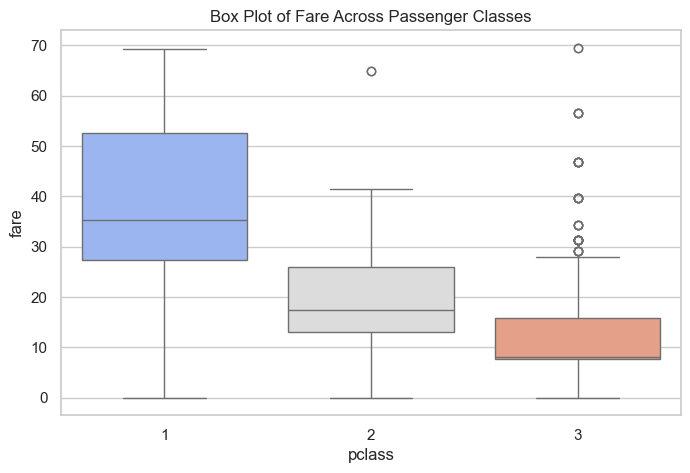

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="pclass", y="fare", data=df, palette="coolwarm")
plt.title("Box Plot of Fare Across Passenger Classes")
plt.show()
# we observe that for the third class there are a few outliers in the fare, but because there are only a few, i dont think they require any extra attention


C:\Users\graun\AppData\Local\Temp\ipykernel_5052\3522208362.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="survived", y="age", data=df, palette="coolwarm", inner="quartile", cut=0)


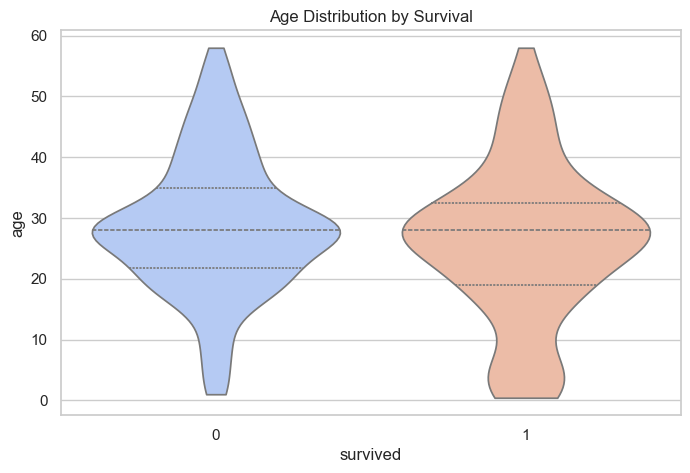

In [17]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="survived", y="age", data=df, palette="coolwarm", inner="quartile", cut=0)
plt.title("Age Distribution by Survival")
plt.show()
# i am cutting the graph and not extrapolating it for ages not present in the titanic dataset   

C:\Users\graun\AppData\Local\Temp\ipykernel_5052\1006666996.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="survived", y="fare", data=df, palette="coolwarm", inner="quartile", cut=0)


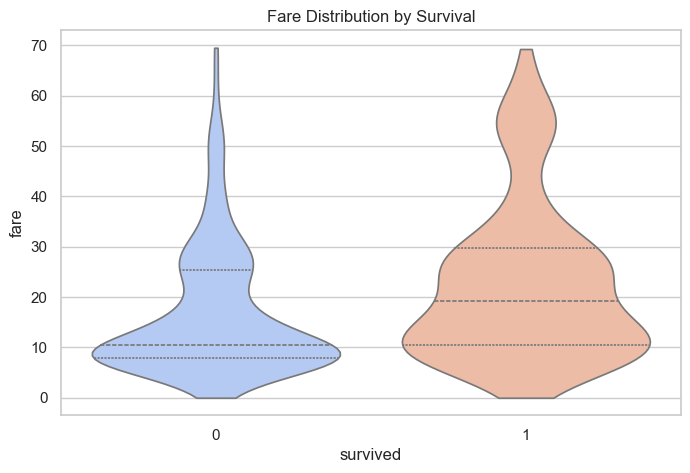

In [18]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="survived", y="fare", data=df, palette="coolwarm", inner="quartile", cut=0)
plt.title("Fare Distribution by Survival")
plt.show()

C:\Users\graun\AppData\Local\Temp\ipykernel_5052\969133393.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="pclass", y="age", data=df, palette="coolwarm", inner="quartile", cut=0)


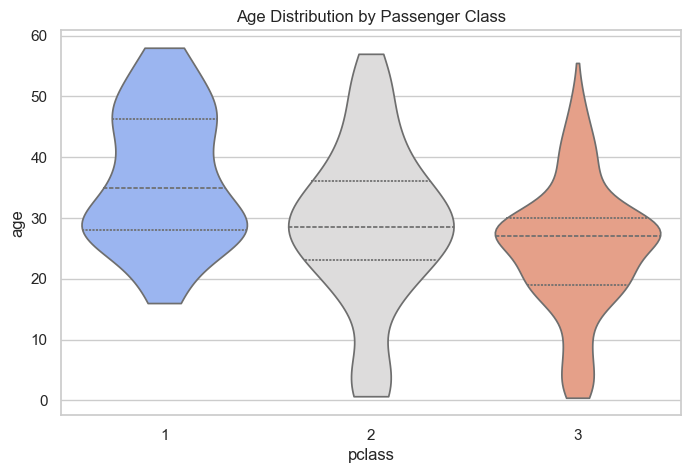

In [19]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="pclass", y="age", data=df, palette="coolwarm", inner="quartile", cut=0)
plt.title("Age Distribution by Passenger Class")
plt.show()

C:\Users\graun\AppData\Local\Temp\ipykernel_5052\961300493.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="sex", y="survived", data=df, palette="coolwarm")


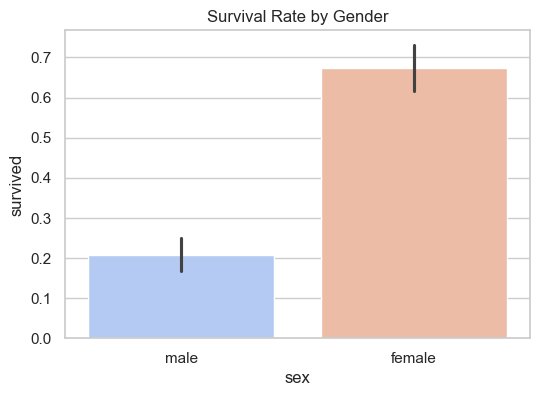

In [20]:
plt.figure(figsize=(6, 4))
sns.barplot(x="sex", y="survived", data=df, palette="coolwarm")
plt.title("Survival Rate by Gender")
plt.show()

C:\Users\graun\AppData\Local\Temp\ipykernel_5052\3179670497.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="child", y="survived", data=df, palette="coolwarm")


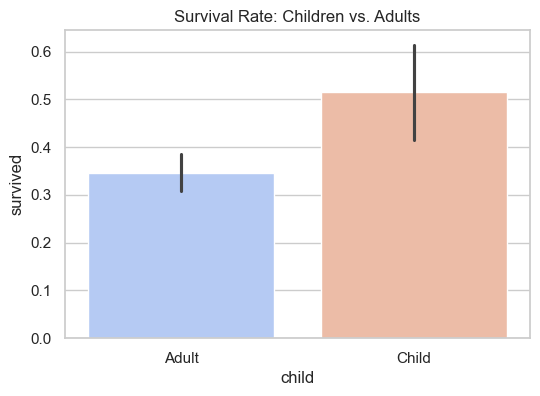

In [21]:
# Creating a new col to classify a person as a child or an adult
df["child"] = df["age"].apply(lambda x: "Child" if x < 18 else "Adult")

# Plot survival rate by child/adult category
plt.figure(figsize=(6, 4))
sns.barplot(x="child", y="survived", data=df, palette="coolwarm")
plt.title("Survival Rate: Children vs. Adults")
plt.show()
# chilren had a better survival rate compared to adults


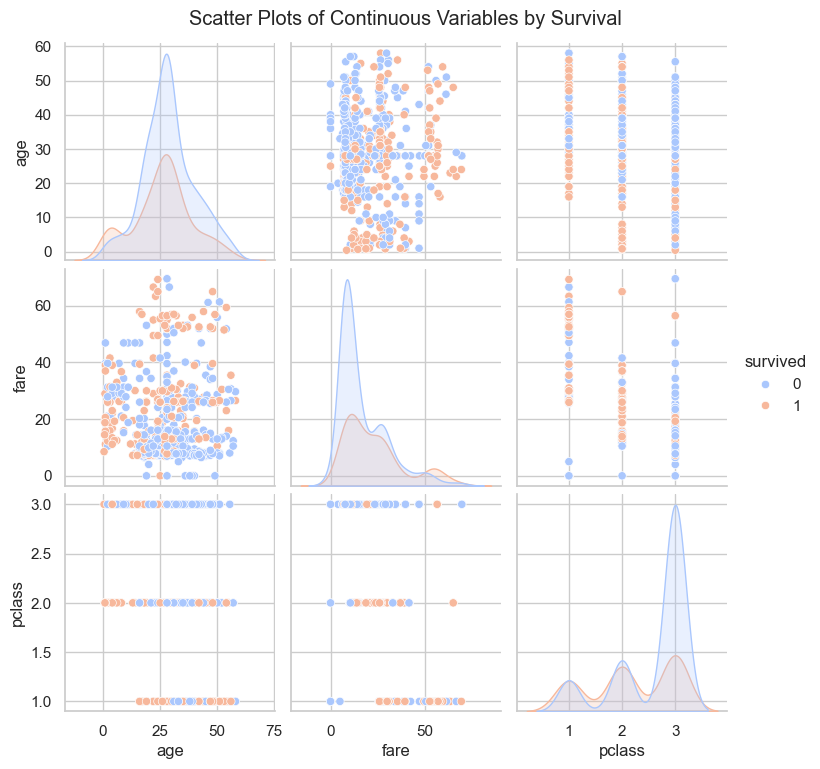

In [22]:
sns.pairplot(df, vars=["age", "fare", "pclass"], hue="survived", palette="coolwarm", kind="scatter")
plt.suptitle("Scatter Plots of Continuous Variables by Survival", y=1.02)
plt.show()

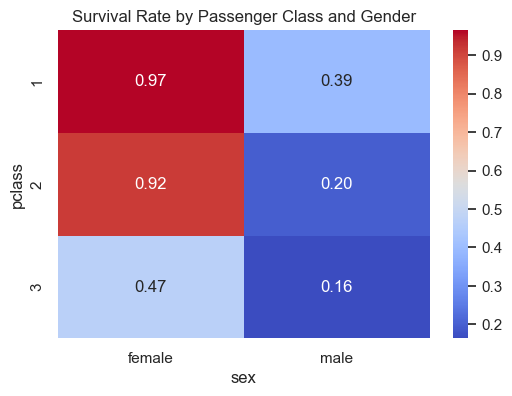

In [23]:
plt.figure(figsize=(6, 4))
sns.heatmap(pd.crosstab(df["pclass"], df["sex"], values=df["survived"], aggfunc="mean"), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Survival Rate by Passenger Class and Gender")
plt.show()

#### for a female in pclass 1, a very high survival rate
#### for a male in pclass 3, a very low survival rate
#### survival rate increases proportionally with the pclass
#### it decreases from male to female  

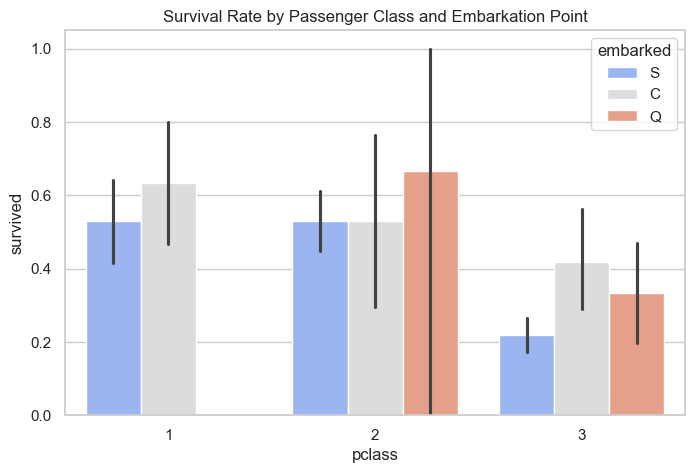

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(x="pclass", y="survived", hue="embarked", data=df, palette="coolwarm")
plt.title("Survival Rate by Passenger Class and Embarkation Point")
plt.show()
